In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Import data

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [53]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")

In [55]:
# df = df.set_index("date")

In [56]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
df.shape

(1304, 1)

In [6]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


<AxesSubplot:xlabel='date'>

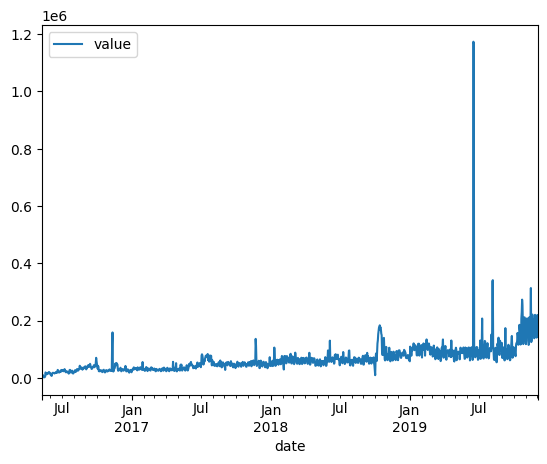

In [8]:
df.plot()

<AxesSubplot:xlabel='date'>

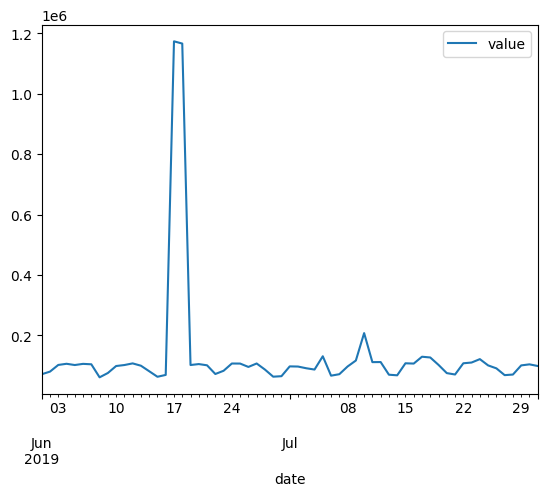

In [9]:
df['2019-6':'2019-7'].plot()

#### Clean data

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [62]:
df_test = df[(df >= df.quantile(0.025)) &  # df.quantile(q=0.5, axis=0, numeric_only=False, interpolation='linear', method='single')
             (df <= df.quantile(0.975))
            ].interpolate(method='linear')  # linear interpolation is not necessary here, the error is in df.quantile()
                                            # I need to specify the "value" column to correctly take the quantile
                                            # otherwise it takes also the quantile of the datetime! ==> gaps which needs to be interpolate

In [63]:
df_test = df[(df["value"] >= df["value"].quantile(0.025)) &
             (df["value"] <= df["value"].quantile(0.975))
            ]

In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


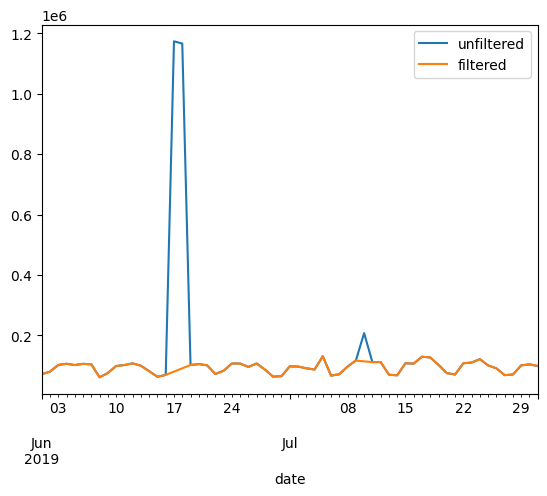

In [65]:
fig, ax=plt.subplots()
df['2019-6':'2019-7'].plot(label="unfiltered", ax=ax)
df_test['2019-6':'2019-7'].plot(label="filtered", ax=ax)
ax.legend(["unfiltered", "filtered"])

#### Draw line plot

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [66]:
def draw_line_plot(data):
    # Draw line plot
    fig, ax=plt.subplots(figsize=(32, 10), dpi=100)
    data.plot(color="r", linewidth=2, ax=ax, legend=False)
    # sns.lineplot(data=data, x=data.index, y="value", color="r", linewidth=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")
    # Save image and return fig (don't change this part)
    # fig.savefig('line_plot.png')
    return fig

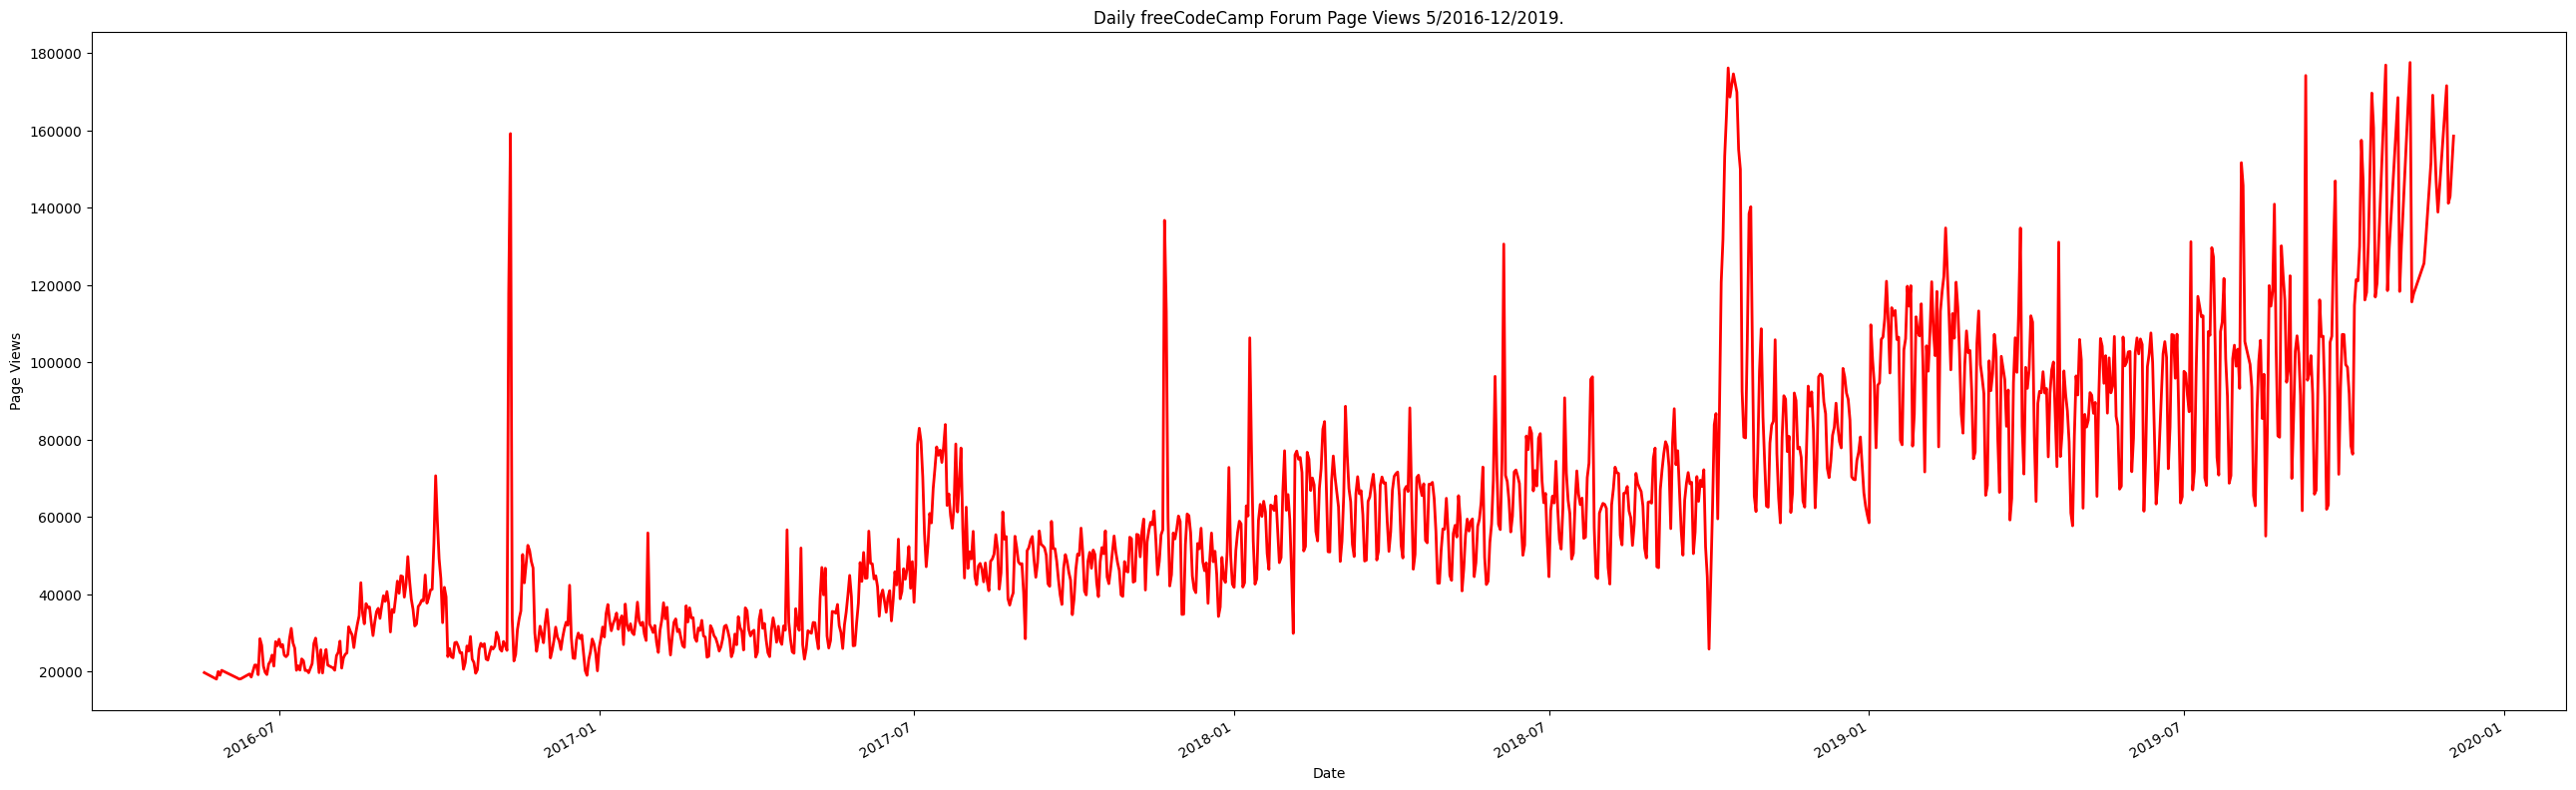

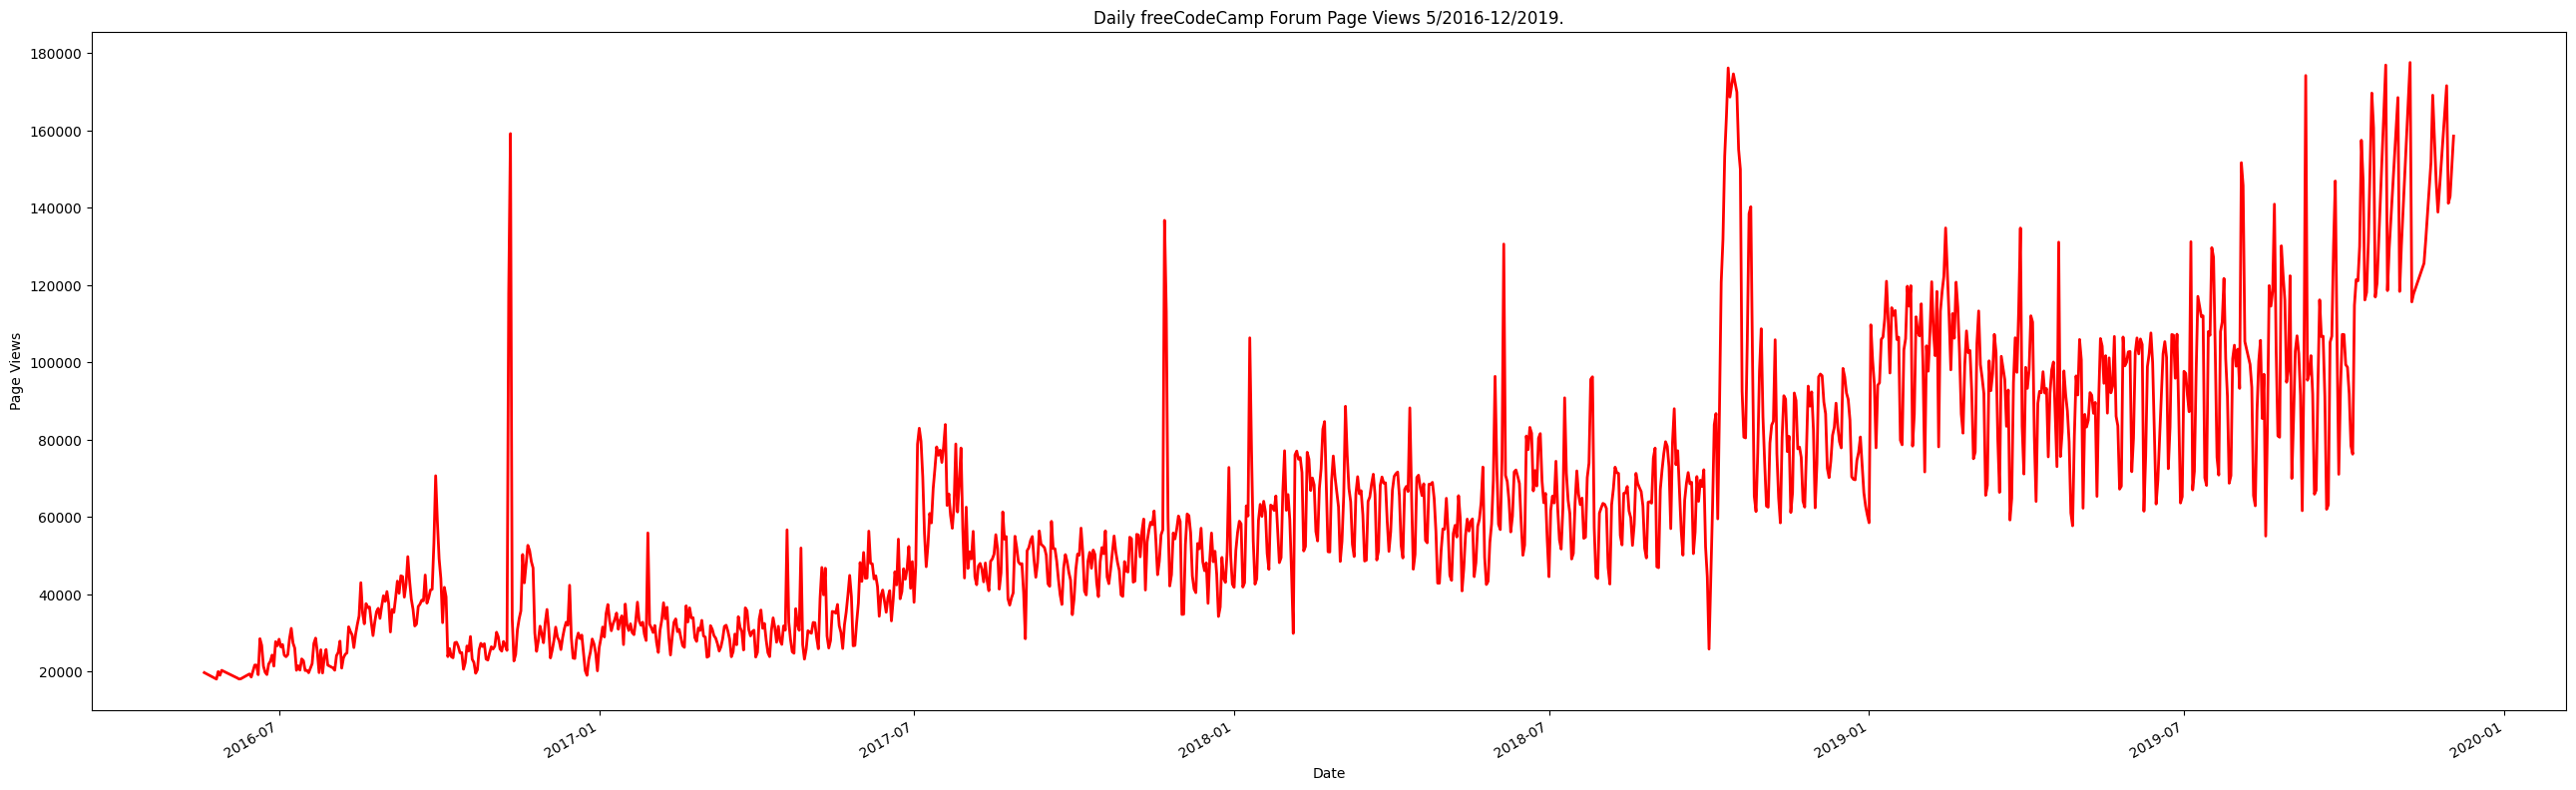

In [67]:
draw_line_plot(df_test)

#### Draw bar plot

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [68]:
df_bar = df_test.copy()
df_bar["years"] = df_bar.index.year
df_bar["month_names"] = df_bar.index.month_name()
df_bar.head()

,value,years,month_names
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


In [69]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   value        1238 non-null   int64 
 1   years        1238 non-null   int64 
 2   month_names  1238 non-null   object
dtypes: int64(2), object(1)
memory usage: 71.0+ KB


In [70]:
df_bar.describe()

,value,years
count,1238.000000,1238.000000
mean,63060.147819,2017.621163
std,31674.626598,1.030389
min,18060.000000,2016.000000
25%,37244.250000,2017.000000
50%,57197.500000,2018.000000
75%,81646.500000,2018.000000
max,177588.000000,2019.000000


In [71]:
missing_months = pd.DataFrame({"years": [2016]*4,
                               "month_names": ["January", "February", "March", "April"],
                               "value": [0]*4})

In [72]:
test = pd.concat([missing_months, df_bar])

In [73]:
test.head()

,years,month_names,value
0,2016,January,0
1,2016,February,0
2,2016,March,0
3,2016,April,0
2016-05-19 00:00:00,2016,May,19736


In [74]:
df_bar_test = test.groupby(["years", "month_names"], sort=False).mean()

In [75]:
df_bar_test.head()

value
years month_names         
2016  January          0.0
      February         0.0
      March            0.0
      April            0.0
      May          19432.4

<AxesSubplot:xlabel='years', ylabel='value'>

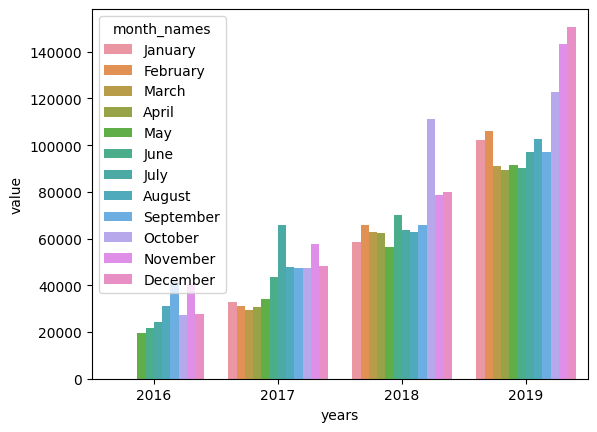

In [76]:
sns.barplot(data=df_bar_test.reset_index(), x="years", y="value", hue="month_names")

In [77]:
df_pivot = pd.pivot_table(test,
                          values="value",
                          index="years",
                          columns="month_names",
                          aggfunc="mean",
                          sort=False
                         )

<AxesSubplot:xlabel='years'>

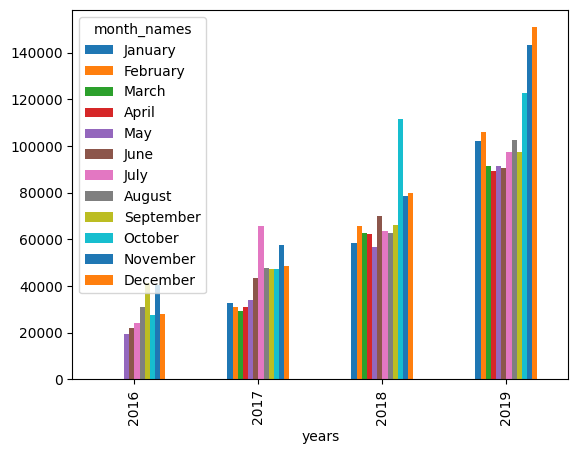

In [78]:
df_pivot.plot.bar()

In [80]:
def draw_bar_plot(data):
    # Copy and modify data for monthly bar plot
    df_bar = data.copy()
    df_bar["Years"] = df_bar.index.year
    df_bar["Months"] = df_bar.index.month_name()
    missing_months = pd.DataFrame({"Years": [2016]*4,
                                   "Months": ["January", "February", "March", "April"],
                                   "value": [0]*4})
    df_bar = pd.concat([missing_months, df_bar])
    df_pivot = pd.pivot_table(data=df_bar,
                              values="value",
                              index="Years",
                              columns="Months",
                              aggfunc="mean",
                              sort=False
                             )

    # Draw bar plot
    fig, ax=plt.subplots(figsize=(15.14,13.30), dpi=100)
    df_pivot.plot.bar(ax=ax)
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")

    # Save image and return fig (don't change this part)
    # fig.savefig('bar_plot.png')
    return fig

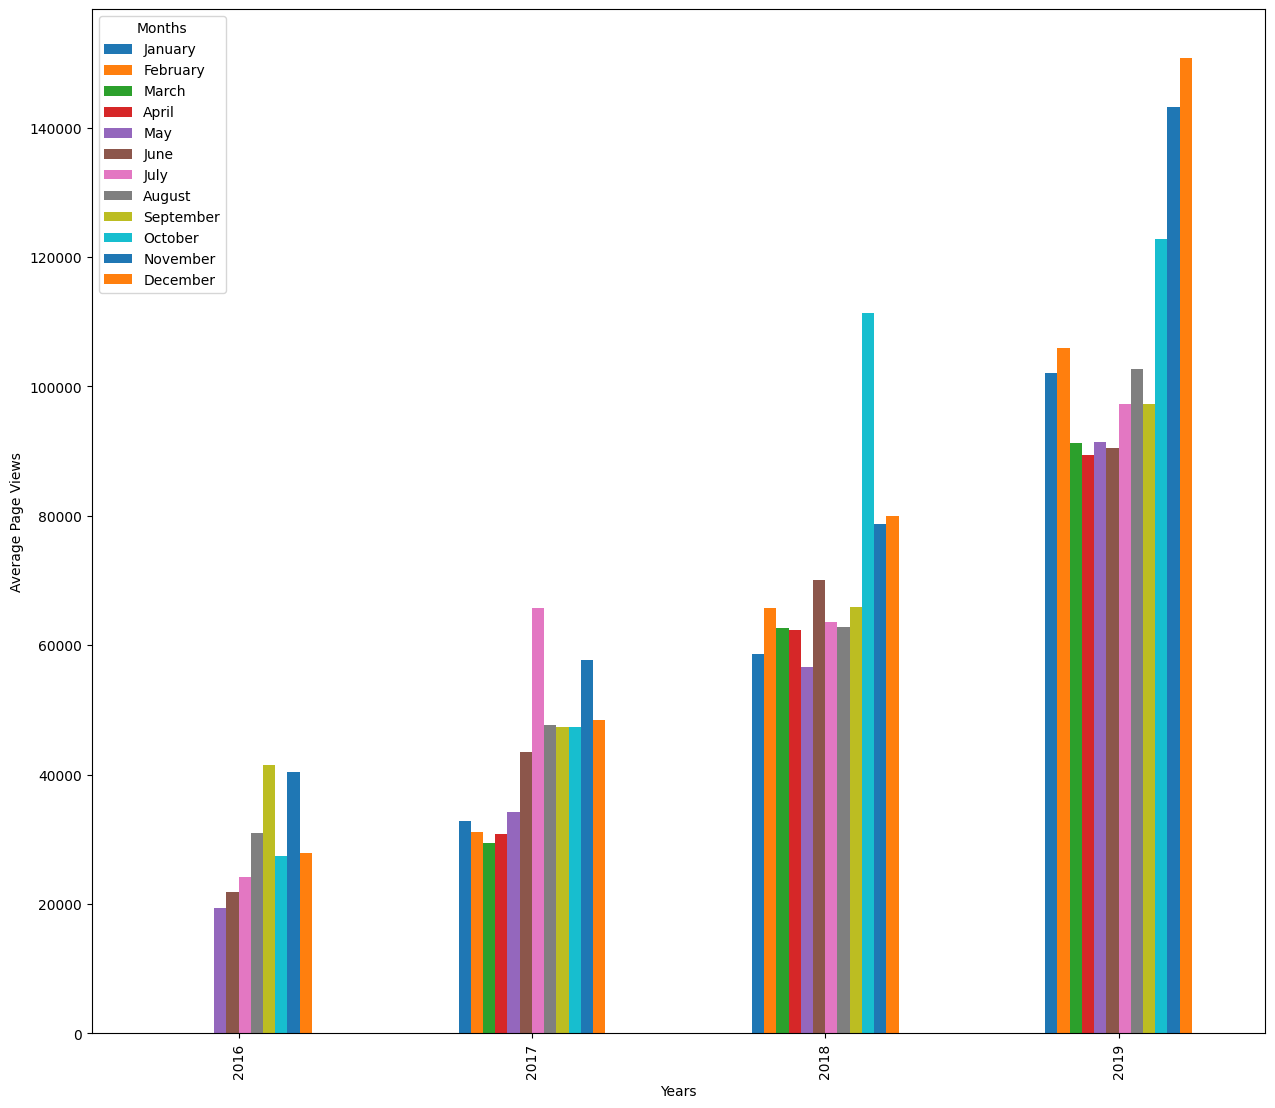

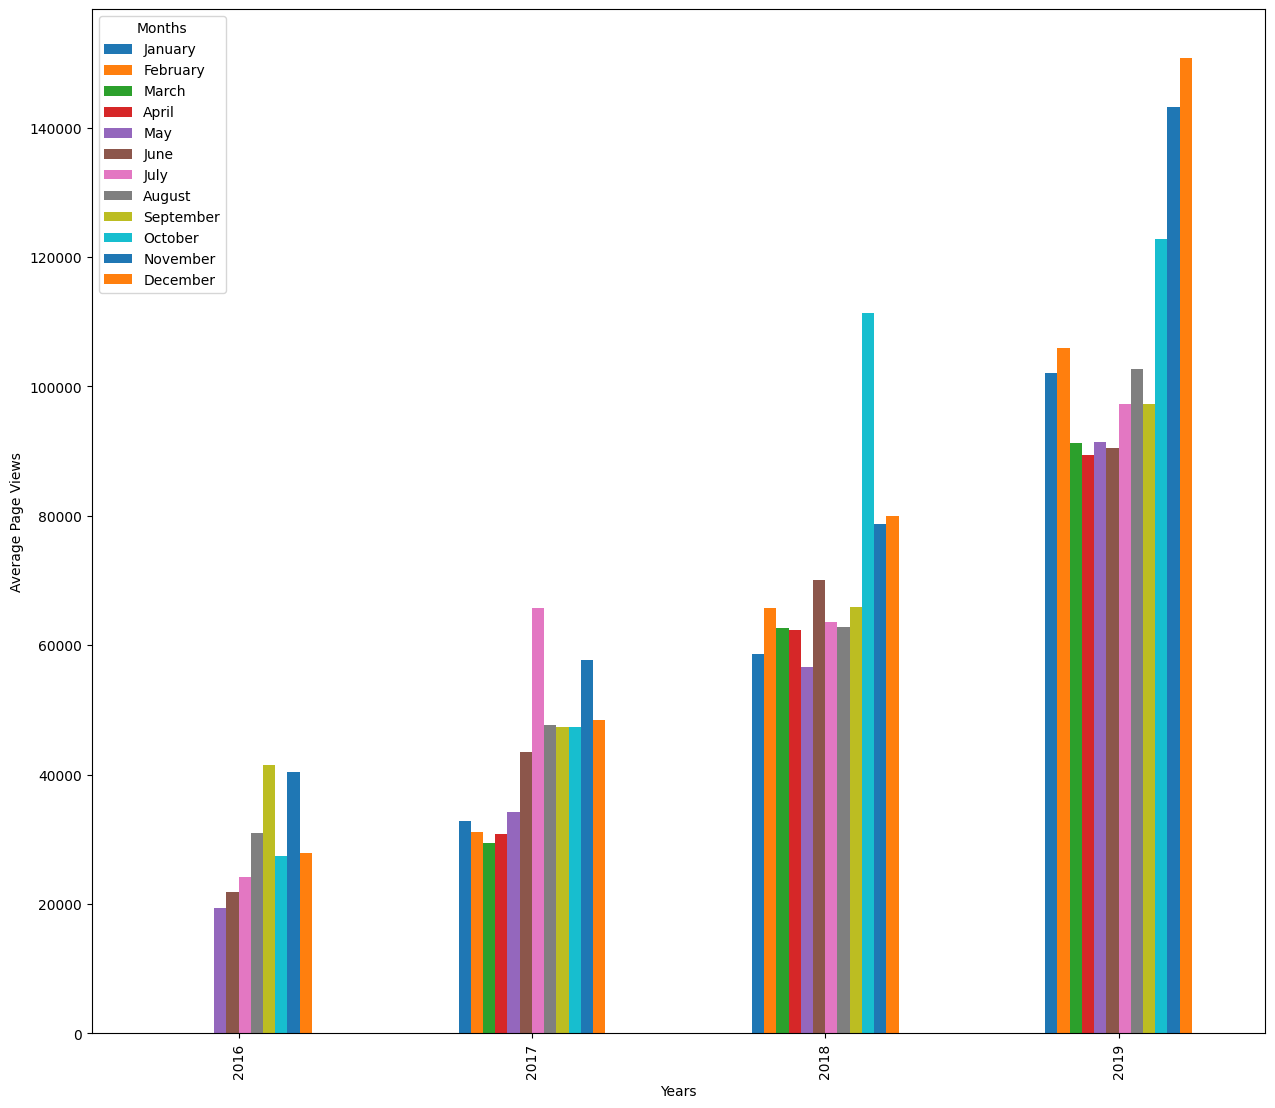

In [81]:
draw_bar_plot(df_test)

#### Draw box plot

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [82]:
box = df_test.copy()

In [83]:
box = box.reset_index()
box.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [84]:
%timeit box["year"] = [d.year for d in box.date]

1.78 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [85]:
%timeit box["month"] = [d.strftime('%b') for d in box.date]

5.1 ms ± 944 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
test = df_test.copy()

In [87]:
%timeit test["year"] = test.index.year

311 µs ± 126 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [88]:
%timeit test["month"] = test.index.month

213 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [89]:
test.head()

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [90]:
box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


In [91]:
box.month.unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

In [92]:
test_months = test[test["year"]==2017].index.month_name().unique().to_list()
test_months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [93]:
months_names = ['Jan', 'Feb', 'Mar',
              'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep',
              'Oct', 'Nov', 'Dec']

<AxesSubplot:xlabel='month', ylabel='value'>

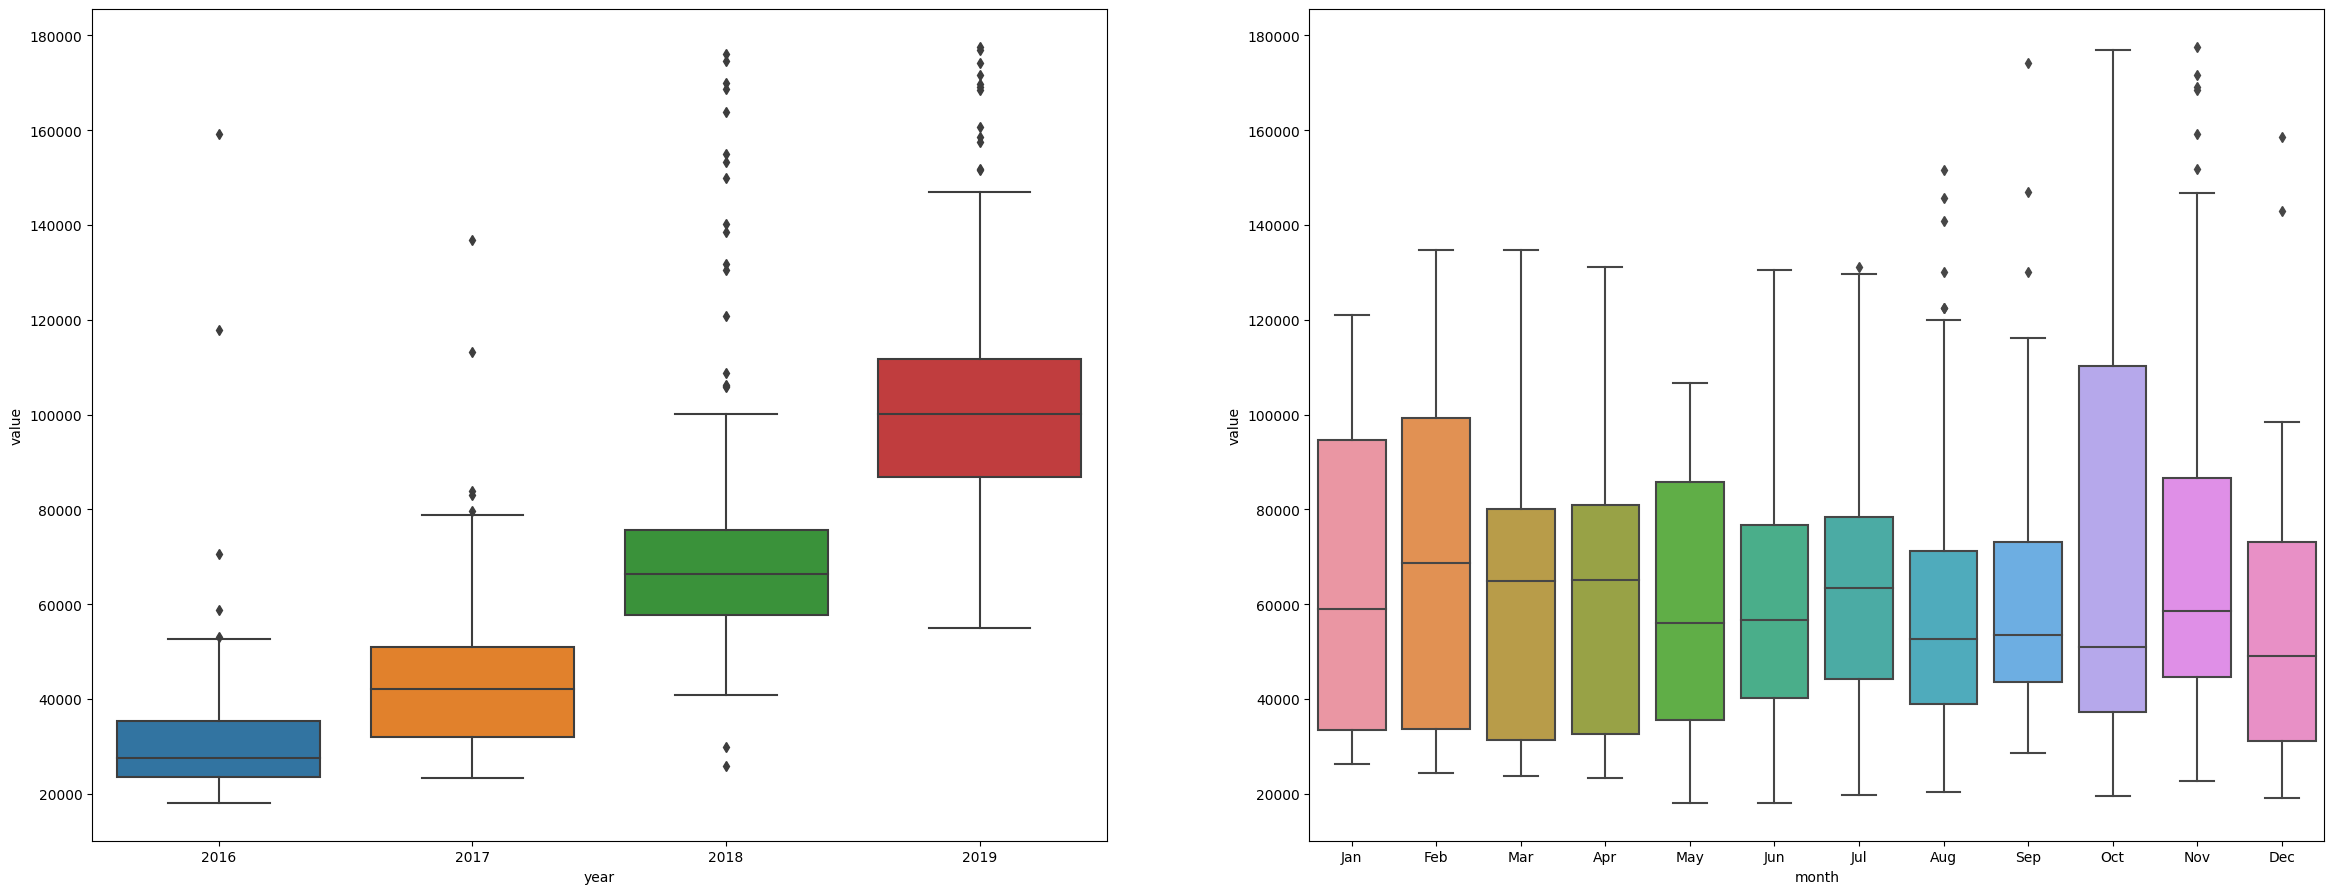

In [94]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(28.8, 10.8), dpi=100)
sns.boxplot(data=box, x="year", y="value", ax=ax[0])
sns.boxplot(data=box, x="month", y="value", order=months_names, ax=ax[1])

In [96]:
def draw_box_plot(data):
    # Prepare data for box plots (this part is done!)
    df_box = data.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    months = ['Jan', 'Feb', 'Mar',
              'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep',
              'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
    fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(28.8, 10.8), dpi=100)
    sns.boxplot(data=df_box, x="year", y="value", ax=ax[0])
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")
    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_ylim(0, 200000)

    sns.boxplot(data=df_box, x="month", y="value", order=months, ax=ax[1])
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")
    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_ylim(0, 200000)

    # Save image and return fig (don't change this part)
    # fig.savefig('box_plot.png')
    return fig

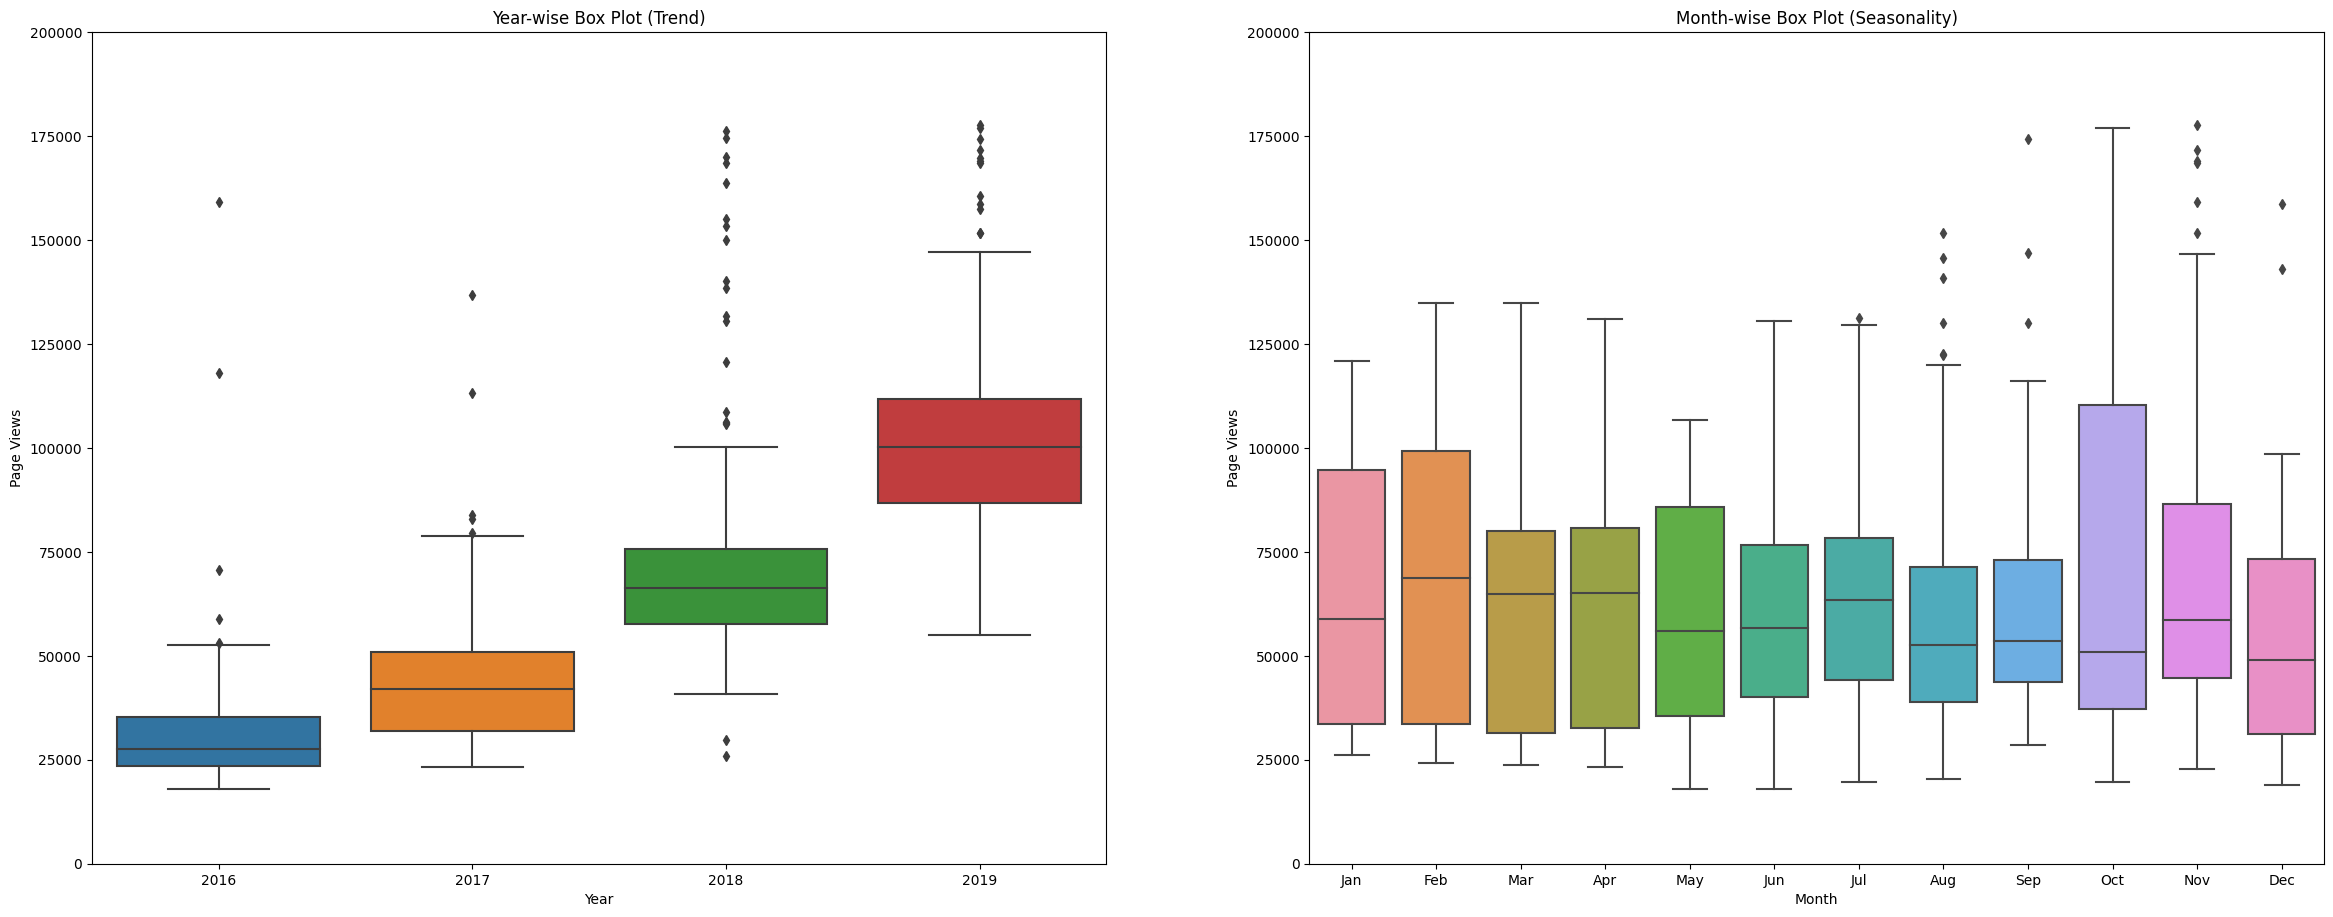

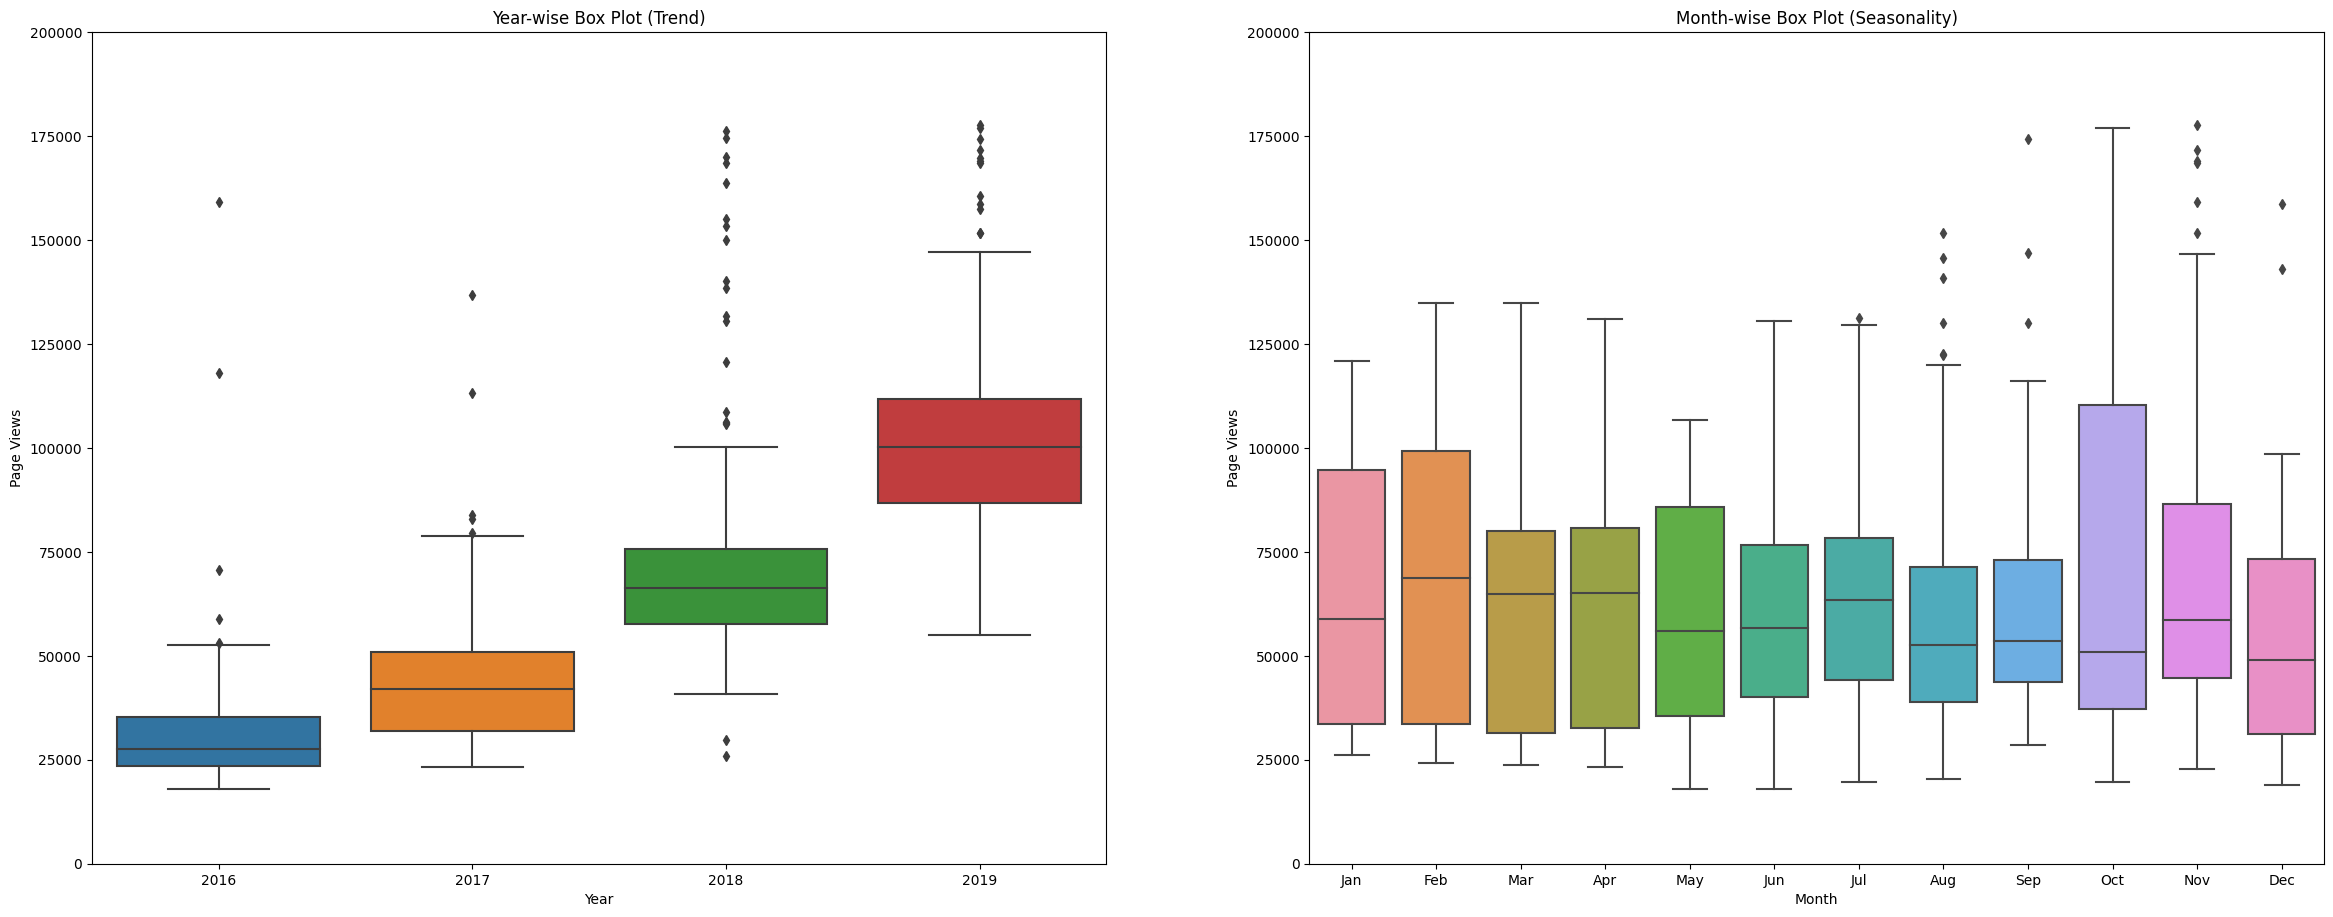

In [97]:
draw_box_plot(df_test)